# Lecture 12 - Data Visualization with Seaborn

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_12-Seaborn/Lecture_12-Seaborn.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_12-Seaborn/Lecture_12-Seaborn.ipynb) 

<a id='top'></a>

**Seaborn** is a Python library for data visualization that provides an interface for drawing plots and conducting data exploration via visualization and informative graphics. Internally, Seaborn uses Matplotlib to create the plots, therefore it can be considered a high-level interface for Matplotlib which allows to quickly and easily customize our plots.

For more information please visit the official [website](https://seaborn.pydata.org). Examples of plots created with Seaborn can be found in the [gallery page](https://seaborn.pydata.org/examples/index.html).

- [12.1 Relational Plots](#12.1-relational-plots)
- [12.2 Distribution Plots](#12.2-distribution-plots)
- [12.3 Categorical Plots](#12.3-categorical-plots)
- [12.4 Regression Plots](#12.4-regression-plots)
- [12.5 Multiple Plots](#12.5-multiple-plots)
- [12.6 Matrix Plots](#12.6-matrix-plots)
- [12.7 Styles, Themes, and Colors](#12.7-styles,-themes,-and-colors)
- [References](#references)

By convention, Seaborn is imported as `sns`. The name Seaborn was originally based on a character named Samuel Norman Seaborn from a television show, and the alias `sns` is based on the character's initials. 

To explain the functionality of Seaborn, in this lecture we will use the following four datasets: `titanic`, `fmri`, `tips`, and `flights`, which can be loaded directly as DataFrames from the Seaborn datasets. We already worked with the `titanic` and `tips` datasets in previous lectures. 

The first few rows of these datasets are shown below. 

In [1]:
# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the datasets for this lecture
titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [2]:
titanic.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

In [3]:
fmri.head(3)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033

In [4]:
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [5]:
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

## 12.1 Relational Plots <a id="12.1-relational-plots"/>

**Relational plots** are used to visualize the statistical relationship between the features in a dataset. 

We will provide examples using the following relational plots in Seaborn:

- Line Plots
- Scatter Plots

### Line Plots

Line plots can be created in Seaborn by using the function `relplot()`, with the `kind` parameter set to `line`. Similarly, setting the `kind` to `scatter` is used for creating scatter plots. In general, `relplot()` is a flexible function that allows to visualize different relational plots between the features. 

In the figure below, we used the `flights` dataset, and plotted the feature `month` along the x-axis and the `passenger` along the y-axis. The plot also calculates the confidence intervals and draws error bars representing the uncertainty for the number of passengers per month. Many plotting functions in Seaborn use statistical estimators to plot data statistics by default. 

Note also that when we create Seaborn plots in Jupyter notebooks, the figure object information is displayed above the plot, in this case `<seaborn.axisgrid.FacetGrid at 0x20dd5e50810>`. The same is true for Matplotlib plots, as they also return the figure object information in Jupyter notebooks. We can suppress the text by either adding `plt.show()` in the cells, or by adding a semicolon to the last line in the cells. We will add a semicolon for all plots in this lecture to suppress the text for the figure objects. 

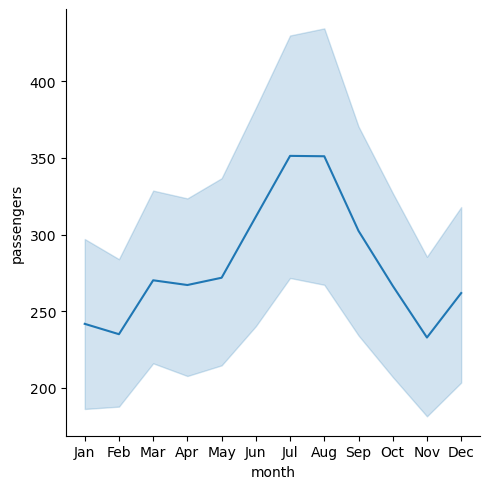

In [6]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')
# Use either 'plt.show()' or add a semicolon to suppress the returned text above the plot

And another plot shows the number of passengers per year.

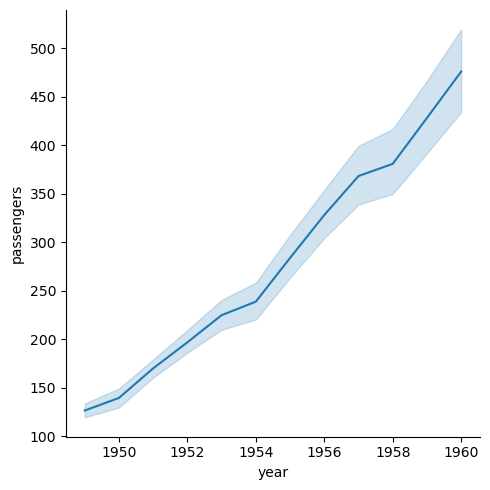

In [7]:
sns.relplot(data=flights, x='year', y='passengers', kind='line');

We can remove the drawn error bars for the confidence intervals by setting the parameter `errorbar=None`. In the older versions of Seaborn this was controlled by the parameter `ci`. Therefore using `ci=None` still works, but it will produce a warning that `ci` has been deprecated. 

Similarly, by setting `style="darkgrid"` in `set_theme()` we indicate to set the background in the plot to a shade of dark, and to show the grid. By applying a theme with `set_theme()` we can control the appearance of all next plots.

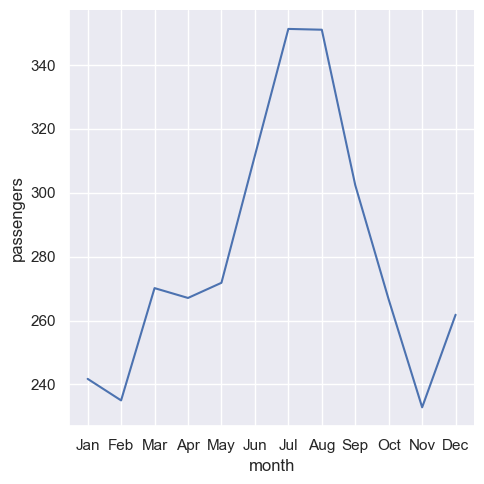

In [8]:
sns.set_theme(style="darkgrid") # show the grid for all next plots on a dark background
sns.relplot(data=flights, x='month', y='passengers', errorbar=None, kind='line');

If we set the confidence interval to `errorbar=sd`, the standard deviation for the x-axis values will be shown in the plot. 

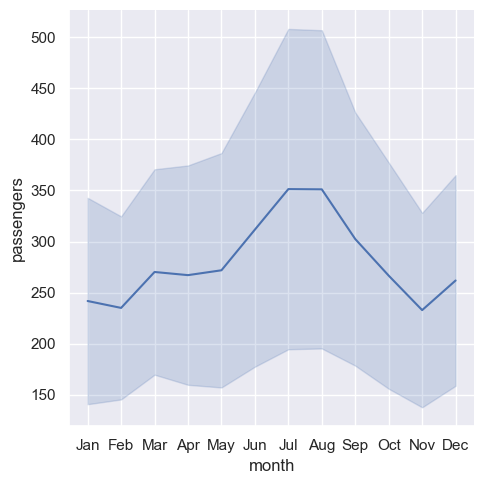

In [9]:
sns.relplot(data=flights, x='month', y='passengers', errorbar='sd', kind='line');

By default, `relplot()` employs a statistical estimator to aggregate the values and display the average values on the y-axis (e.g., average number of passengers per month). If we would like to see all values on the y-axis instead of the average values, we can set the parameter `estimator=None`.

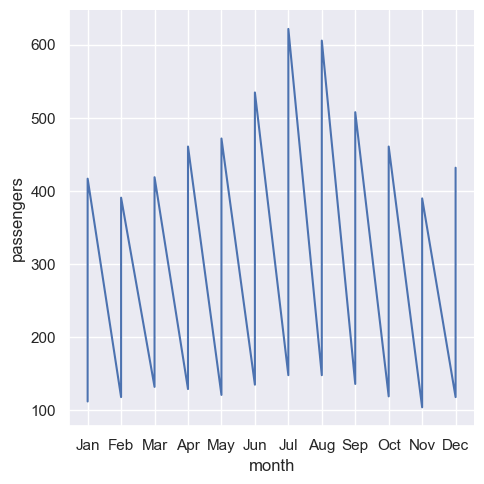

In [10]:
sns.relplot(data=flights, x='month', y='passengers', errorbar=None, estimator=None, kind='line');

We can plot multiple lines in a figure by setting the `hue` parameter to another feature in the dataset.

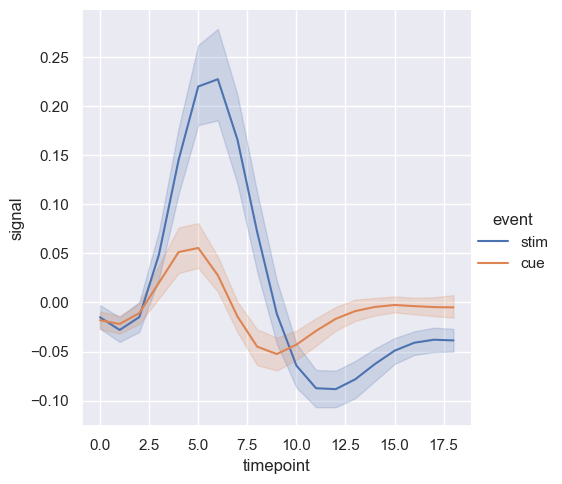

In [11]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line');

The parameter `style` allows to vary the appearance of the lines based on a specified feature (in the next cell, based on the feature `event`). Seaborn will automatically assign a different line style (e.g., dashed line) to each category in the feature `event`. In this case, there are two categories: `stim` and `cue`.

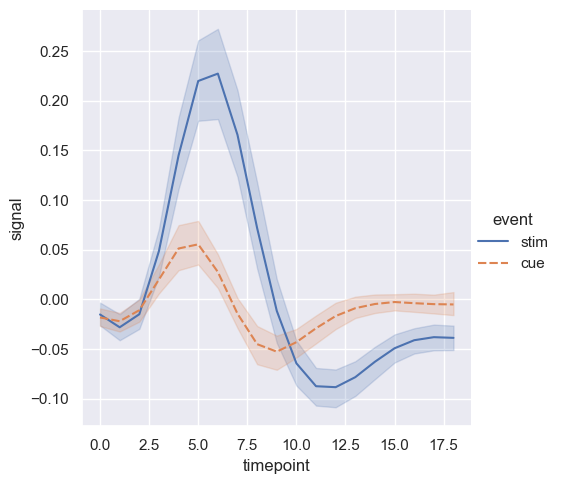

In [12]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', style='event');

To highlight the differences between the categories in `hue`, we can use `markers=True` to add markers for the data points.

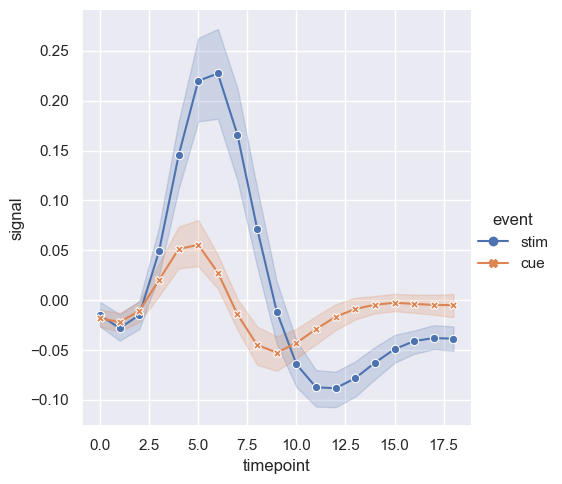

In [13]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', 
            style='event', dashes=False, markers=True);

And, we can plot multiple relationships by introducing a parameter `col` to create multiple columns, or we can also introduce multiple rows with the `row` parameter, as in the following cell below.

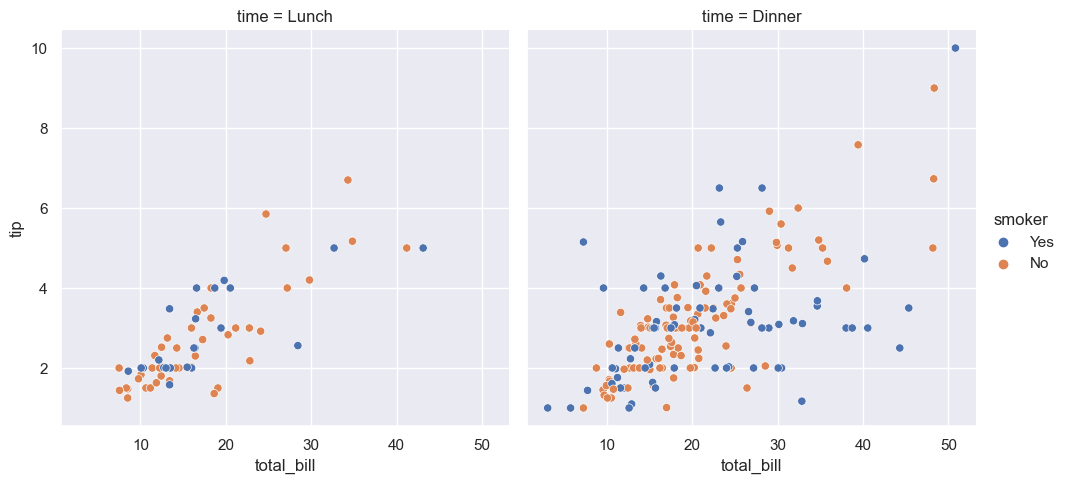

In [14]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time');

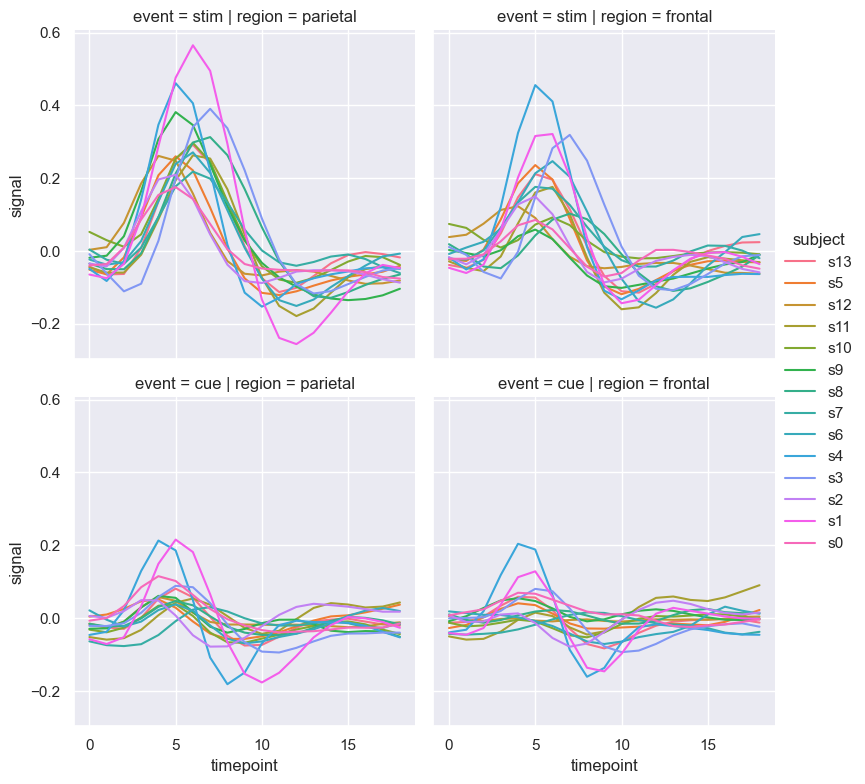

In [15]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='subject',
           col='region', row='event', height=4, kind='line', estimator=None);

### Scatter Plots

We can create scatter plots in Seaborn by using either `sns.scatterplot()` or `sns.relplot()`.

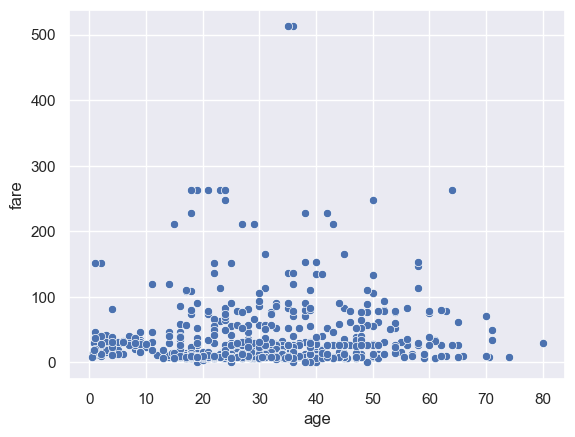

In [16]:
sns.scatterplot(data=titanic, x='age', y='fare');

Similar to line plots, the `hue` parameter distinguishes the data points in the plot based on another feature. 

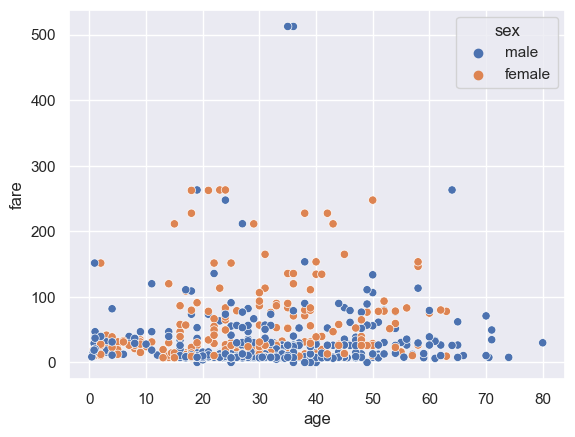

In [17]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex');

To highlight the difference between the categories in `hue`, we can add different marker styles with `style='sex'`.

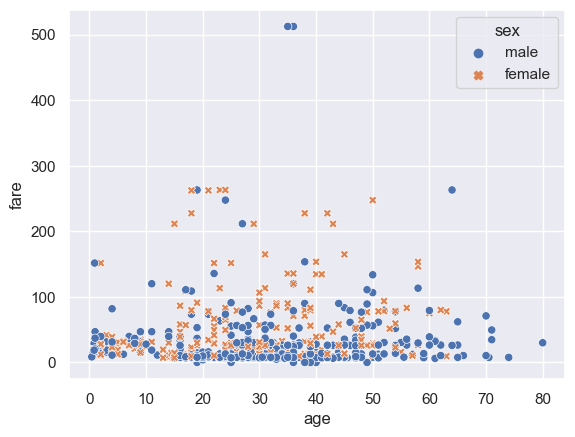

In [18]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='sex');

Recall that the default size of figures in Matplotlib is 6.4 by 4.8 inches. The same applies to Seaborn, and similar to Matplblib, to specify the figure size, we can use `figure(figsize=())`. 

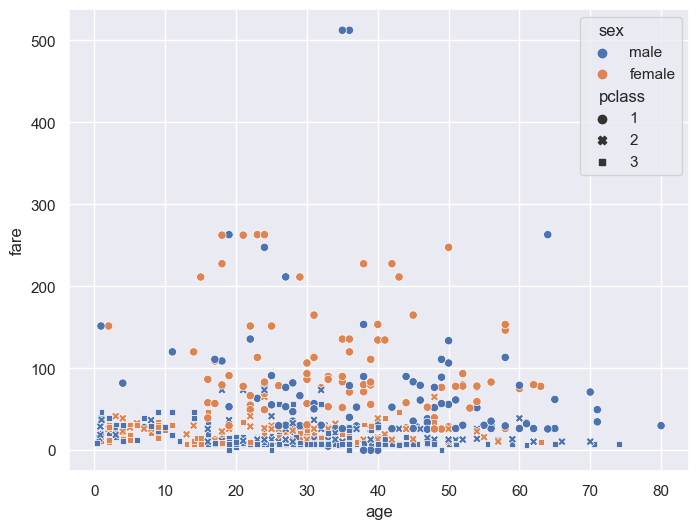

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass');

We can also define the type of markers to use with the parameter `markers`. 

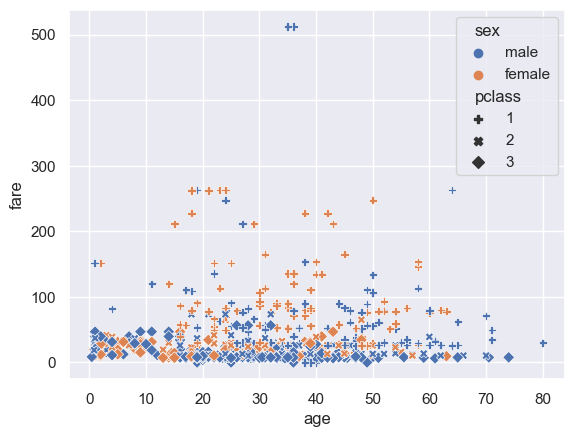

In [20]:
marker_types = {1:'P', 2:'X', 3:'D'} # P(plus), X (cross), and D (diamond) markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=marker_types);

Adding the parameter `sizes` can make the plot more meaningful, as Seaborn will use `sizes` to control the size of the markers in the plot.

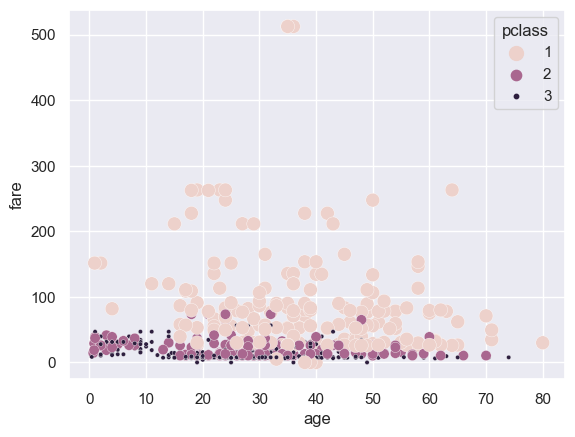

In [21]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass', size='pclass', sizes=(100,10));

## 12.2 Distribution Plots <a id="12.2-distribution-plots"/>

**Distribution plots** visualize the distribution of data features, and can help understand the range of values, their central tendency, potential skewness in the data, presence of outliers, and other data characteristics. 

Distribution plot functions in Seaborn include:

- `displot()`
- `histplot()`
- `jointplot()`
- `pairplot()`
- `rugplot()`
- `kdeplot`

### Plotting Histograms with `displot()` and `histplot()`

The `displot()` function is a general function for plotting different distributional plots. Its default behavior is to draw a histogram, and internally `displot()` uses the `histplot()` function to draw histograms. By changing the parameter `kind` in `displot()`, we can create different distributional plots. 

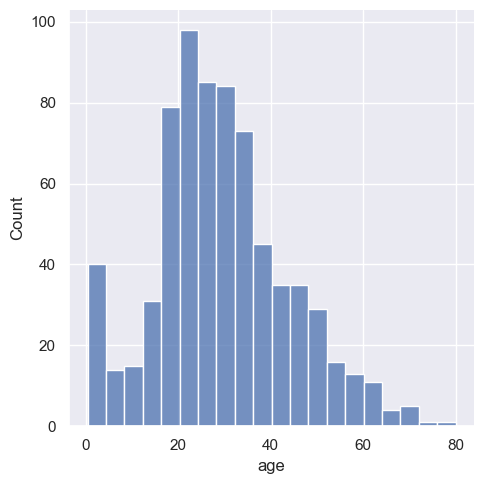

In [22]:
sns.displot(titanic['age']);

We can set the number of `bins` in histograms to a value of choice. Similarly, if we set the parameter `kde` which stands for Kernel Density Estimator (KDE)  to True, a KDE plot will be overlaid on top of the histogram. KDE is a smoothed curve representation of the probability density function of the data. It uses a Gaussian kernel to smooth the data distribution. 

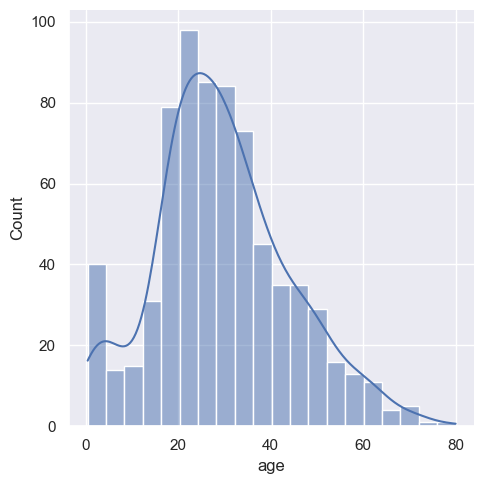

In [23]:
sns.displot(titanic['age'], kde=True, bins=20);

We can also plot categorical data with histograms, in which case the histograms become bar plots. The parameter `shrink` in the next cells has a value between 0 and 1 and controls the width of the bars in the plot. Compare the following two cells. 

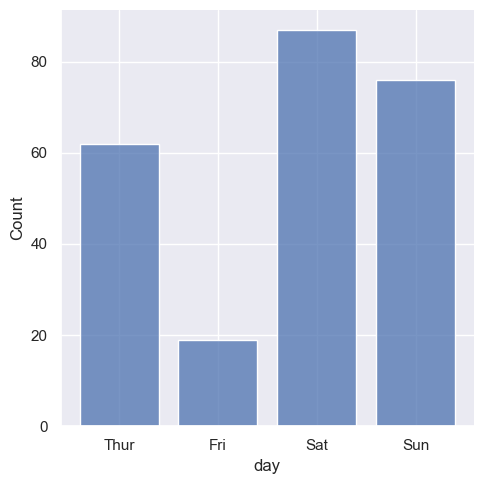

In [24]:
sns.displot(tips, x='day', shrink=0.8);

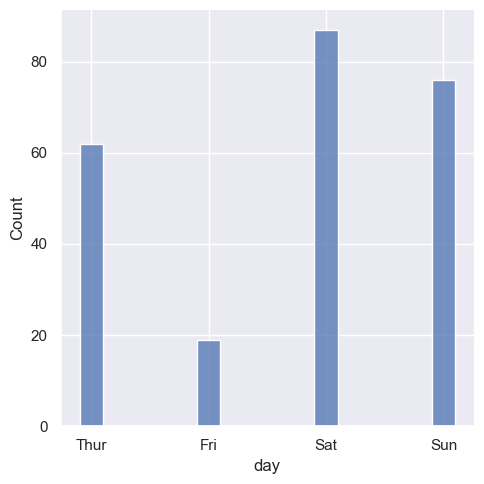

In [25]:
sns.displot(tips, x='day', shrink=0.2);

We can also use `histplot()` to draw histograms. 

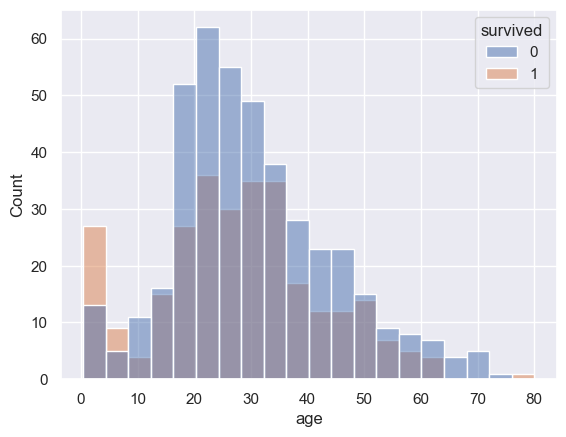

In [26]:
sns.histplot(titanic, x="age", hue="survived");

We can stack histograms of multiple features by setting the parameter `multiple` to `'stack'`.

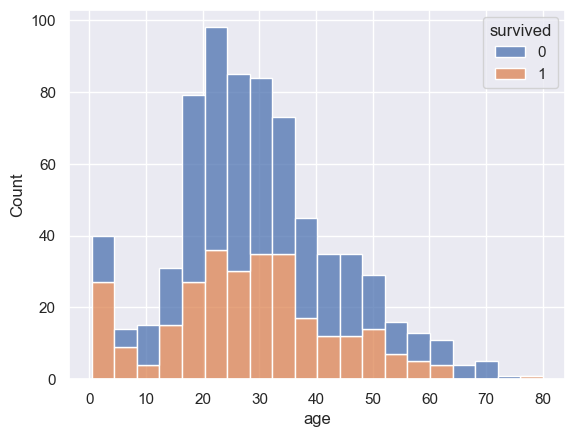

In [27]:
sns.histplot(titanic, x='age', hue='survived', multiple='stack');

### Bivariate Analysis Plots with `jointplot()`

We can use `jointplot()` to plot the joint distribution between two features along with the marginal distribution for each of the features. This function creates multi-panel plots, and it provides useful statistical visualization for any two features in a dataset. 

The **joint distribution** drawn in the central plot displays the simultaneous behavior of the two features as they both change, i.e., it provides information about the probability of different combinations of values for the two features. 

The **marginal distribution** plots are shown on the side axes, and they show the distribution of each feature when considered separately. I.e., they show the histogram for numerical features or the bar plot for categorical features. 

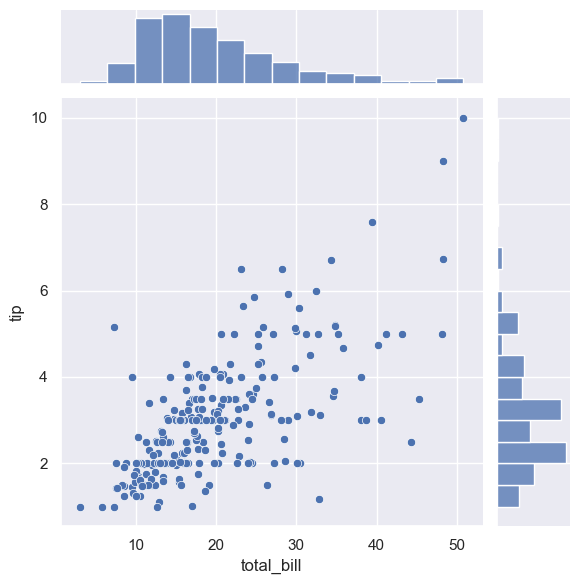

In [28]:
sns.jointplot(data=tips, x='total_bill', y='tip');

In the function `jointplot()`, the following options for the parameter `kind` are available:

- `scatter` (default) displays a scatter plot 
- `hex` displays a hexagonal binning style to visualize the density
- `kde` displays kernel density estimates
- `reg` displays a scatter plot with a linear regression line
- `resid` displays the residuals of a linear regression, useful for checking goodness of fit

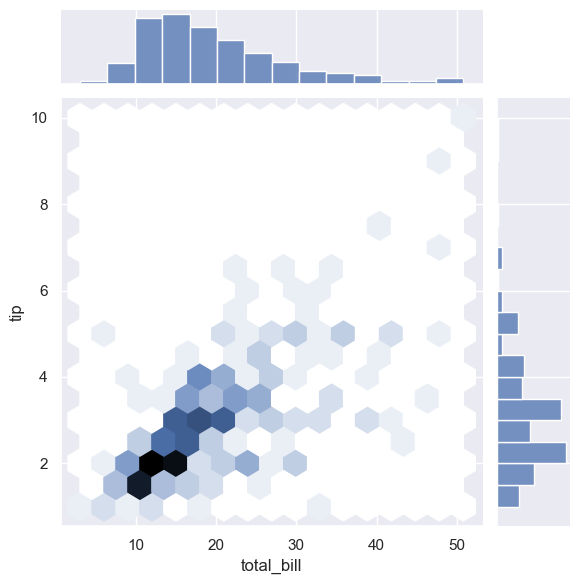

In [29]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex');

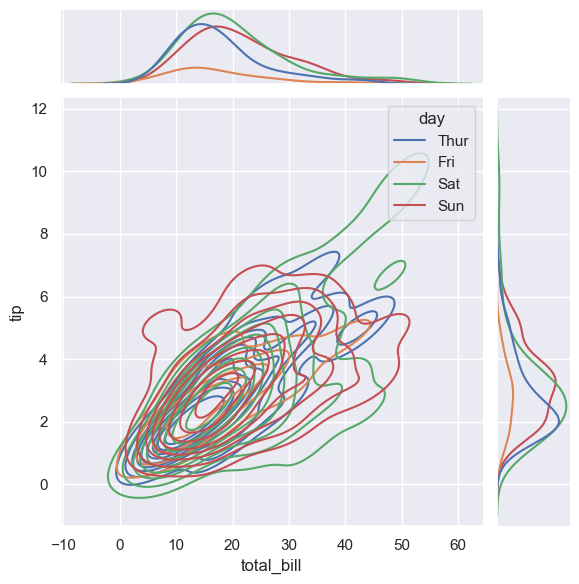

In [30]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue='day', kind='kde');

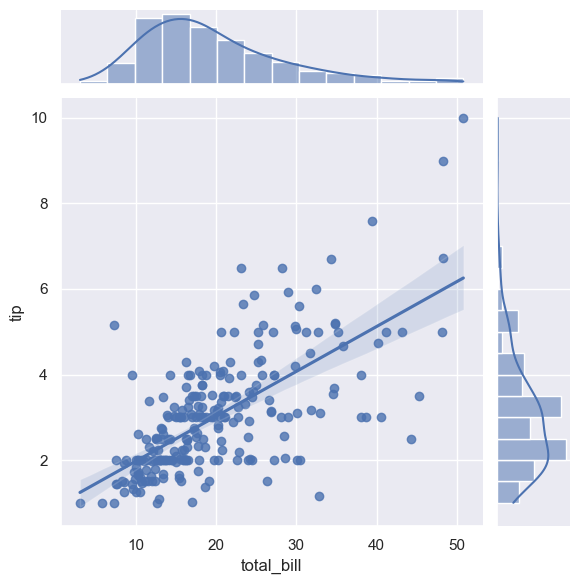

In [31]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg');

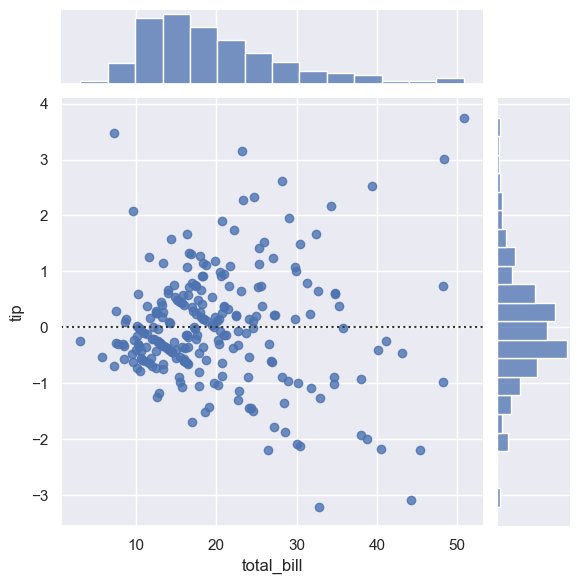

In [32]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid');

### Multivariate Analysis Plots with `pairplot()`

The function `pairplot()` visualizes all possible joint and marginal distributions for all pairwise relationships and for each variable in datasets. It allows to immediately notice relationships between the features. 

In particular, `pairplot()` creates a grid of subplots, where the diagonal subplots are the marginal distributions of each feature (i.e., histograms for numerical features and bar plots for categorical features), and the off-diagonal subplots draw the pairwise joint distributions between different pairs of features. 

Note the difference: while `jointplot()` visualizes the relationship between two features (bivariate analysis), `pairplot()` visualizes the pairwise relationships between all features in a dataset (muliivariate analysis).

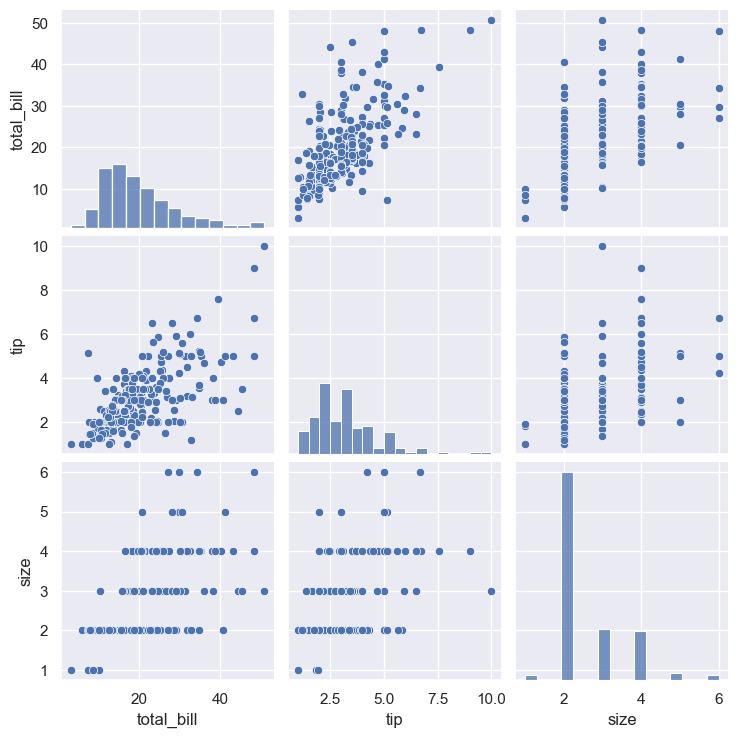

In [33]:
sns.pairplot(tips);

### Plotting Distributions with `rugplot()`

The function `rugplot()` visualizes marginal distributions by drawing ticks or dashes along the x-axis and/or y-axis in a plot. It consists of short vertical 'ticks' where each tick shows the presence of a data point at that value on the axis. This plot is useful for showing the density of data points along an axis. 

The ticks in the plot resemble the appearance of a rug, therefore, it is named a rug plot. 

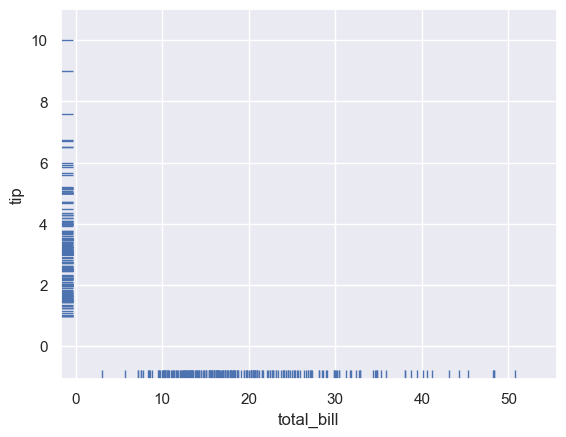

In [34]:
sns.rugplot(data=tips, x='total_bill', y='tip');

Similarly, we can combine `relplot()` and `rugplot()` in one figure.

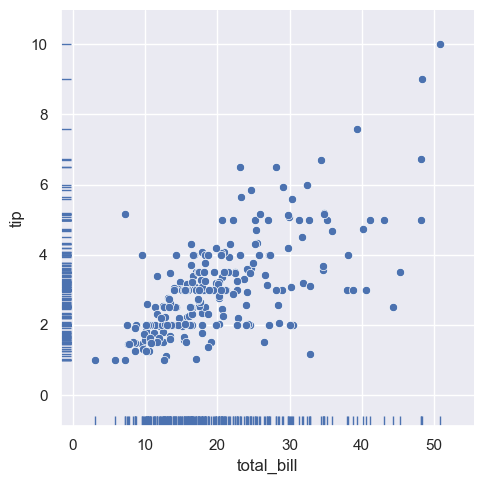

In [35]:
sns.relplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip');

### Kernel Density Estimation (KDE) Plot with `kdeplot()`

Besides using the `kde` parameter with `displot()`, Seaborn also provides the function `kdeplot()` to visualize the smoothed curve of the probability density function of a single feature or multiple features. 

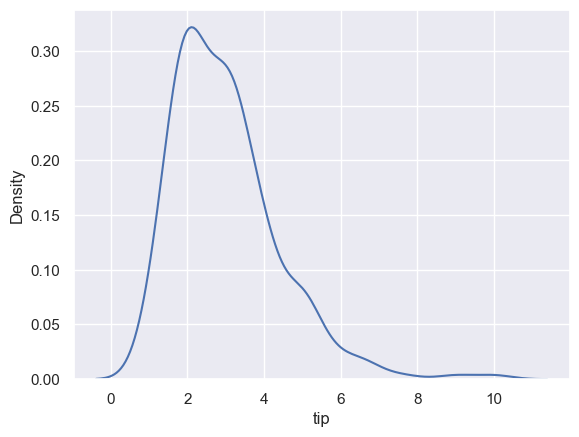

In [36]:
sns.kdeplot(data=tips, x='tip');

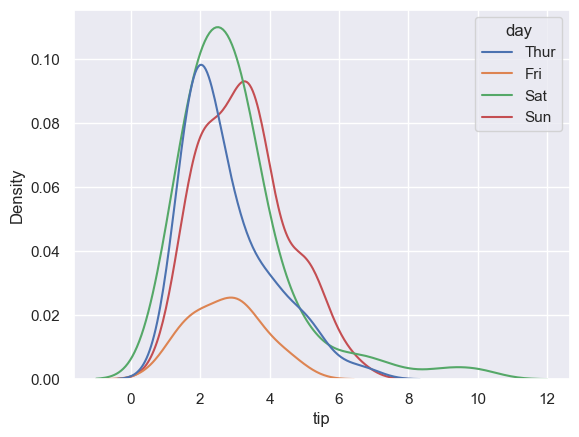

In [37]:
sns.kdeplot(data=tips, x='tip', hue='day');

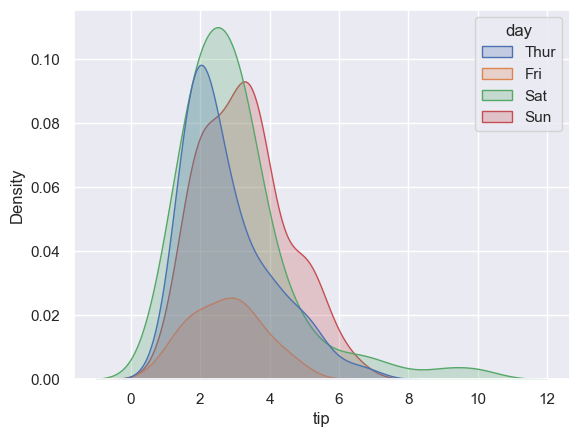

In [38]:
sns.kdeplot(data=tips, x='tip', hue='day', fill=True);

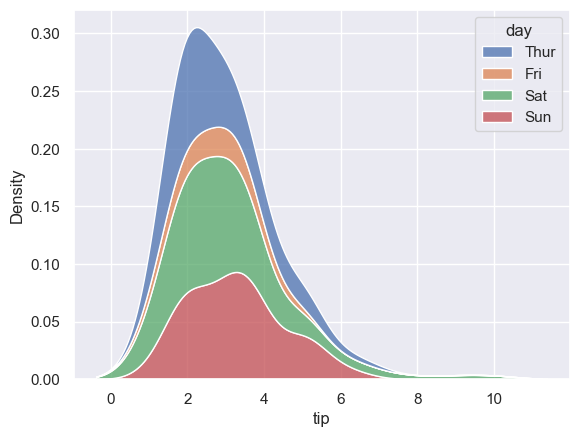

In [39]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

### Cumulative Distributions

By setting the parameter `kind` in `displot()` to `ecdf`, we can plot the cumulative distribution of a feature, where `ecdf` stands for `empirical cumulative distribution function`.

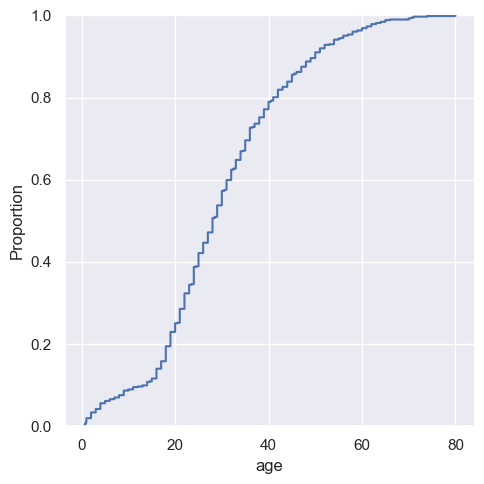

In [40]:
sns.displot(titanic, x='age', kind='ecdf');

## 12.3 Categorical Plots <a id="12.3-categorical-plots"/>

In Seaborn, there are various plot functions for visualizing categorical data. These include:

1. Categorical estimate plots

- `barplot()`
- `countplot()`
- `pointplot()`

2. Categorical distribution plots

- `boxplot()`
- `boxenplot()`
- `violinplot()`

3. Categorical scatter plots

- `stripplot()`
- `swarmplot()`

Similar to the high-level function `displot()` for creating distribution plots, Seaborn also provides a high-level function `catplot()` for plotting all of the above types of categorical plots, by passing different values for the `kind` parameter. The available settings include: `bar`, `count`, `point`, `box`, `boxen`, `violin`, `strip`, and `swarm`. 

### Categorical Estimate Plots

The function `barplot()` is used to visualize statistics of categorical data based on different statistical estimator functions (mean is the default estimate). As stated earlier, to create bar plots we can either use `barplot()` or `catplot(..., kind='bar')`.

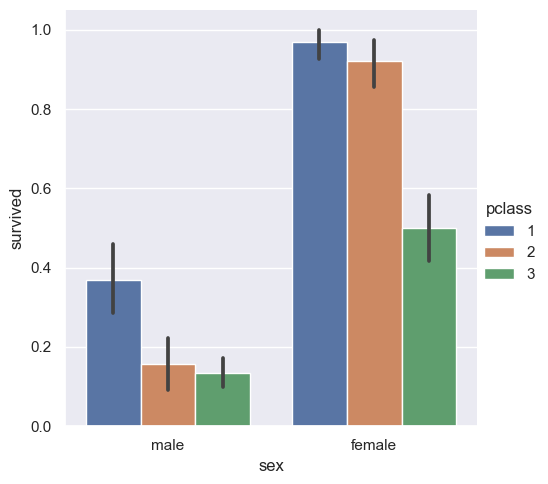

In [41]:
sns.catplot(data=titanic, x='sex', y='survived', hue='pclass', kind='bar');

The function `countplot()` is used to visualize the number of observations in each category. 

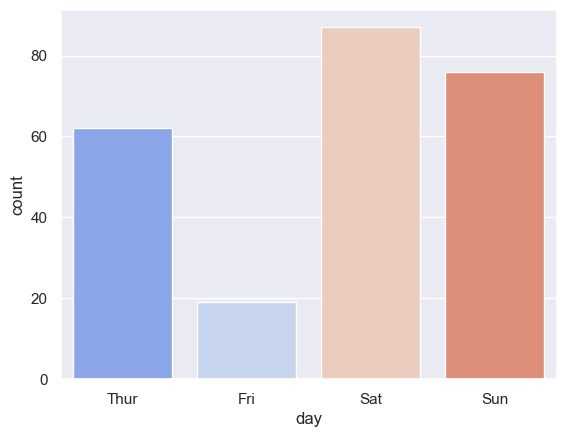

In [42]:
sns.countplot(data=tips, x='day', palette='coolwarm');

# The same plot can be obtained with
#sns.catplot(data=tips, x='day', palette='coolwarm', kind='count')

Rather than plotting bars, the function `pointplot()` visualizes the point estimates of categorical data. Notice that it can also connect the points with the categorical variable specified with `hue`.

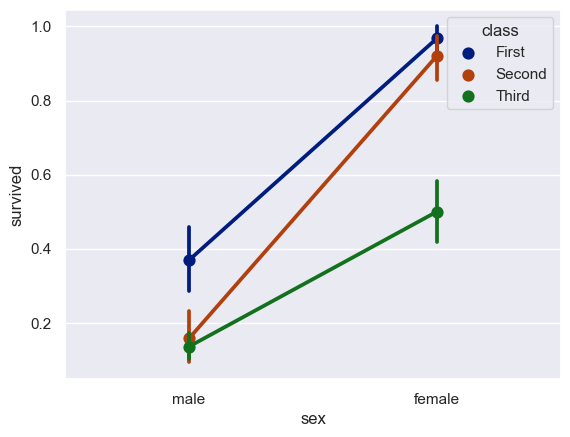

In [43]:
sns.pointplot(data=titanic, x='sex', y='survived', hue='class', palette='dark');

### Categorical Distribution Plots

The functions `boxplot()`, `boxenplot()`, and `violinplot()` are used to plot the distributions of categorical data. 

A box plot (or box-and-whisker plot) shows the median, the inter-quartile range with the first (25%) and third (75%) quartiles of the dataset, and the whiskers extend to show the rest of the distribution. Exceptions are data points that are determined to be outliers based on a method that is a function of the inter-quartile range.

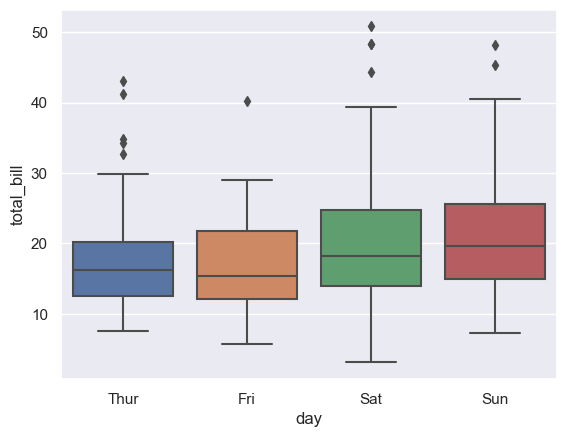

In [44]:
sns.boxplot(data=tips, x='day', y='total_bill');

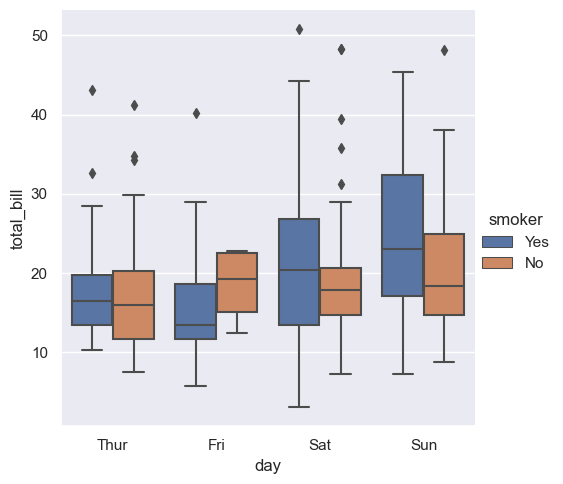

In [45]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box');

The `kind` parameter set to `boxenplot` creates boxen plots, which are an enhanced version of box plots. Boxen plots employ additional steps for calculating the quartiles, and are more efficient in visualizing features that have many outliers. 

The approach for creating boxen plots includes first dividing the data into groups and then iteratively constructing the plot by starting with the largest group and data and progressing to the smallest group of data. The boxes can be considered subgroups of data, with the width and height corresponding to the size and range of the data in the groups. Therefore, the boxes do not correspond to the first and third quartiles, as in traditional box plots.

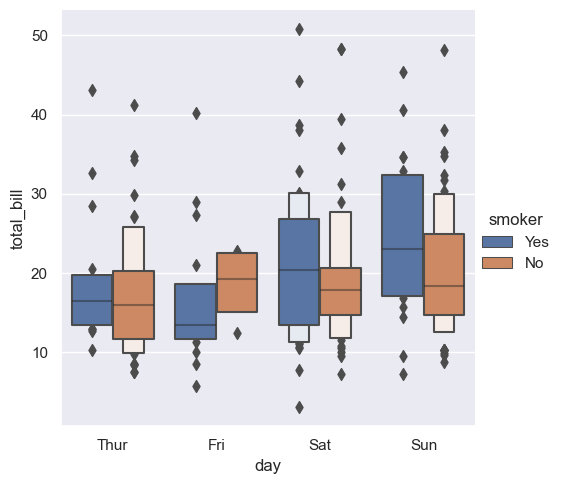

In [46]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='boxen');

The function `violinplot()` shows the entire distribution of categorical data and uses a rotated kernel density plot on both the right and left sides of the plots. Understandably, the plots resemble violins, and they make it easier to visualize the shape, skewness, and presence of multiple peaks in the data distribution. Unlike box plots and boxen plots, violin plots do not display the individual outliers in the data. 

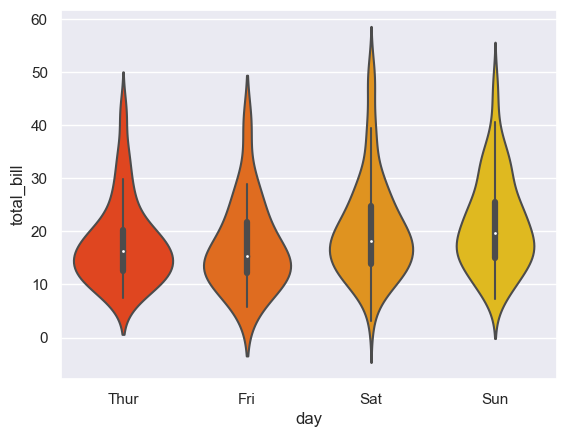

In [47]:
sns.violinplot(data=tips, x='day', y='total_bill', palette='autumn');

### Categorical Scatter Plots

The functions `stripplot()` and `swarmplot()` visualize categorical data with scatter plots.

In a `stripplot()` the data points are shown in a strip, whereas in a `swarmplot()` the data are randomly shifted horizontally to avoid overlaps. Strip plots are simpler and can be used to see the exact positions of data points, and swarm plots resemble a swarm of bees and they make it easier to see the distribution of the data points. 

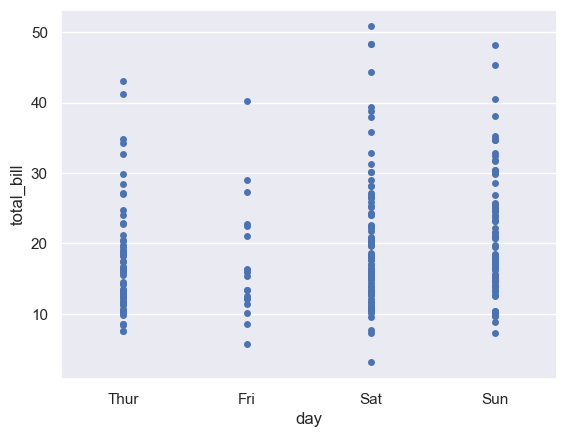

In [48]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False);

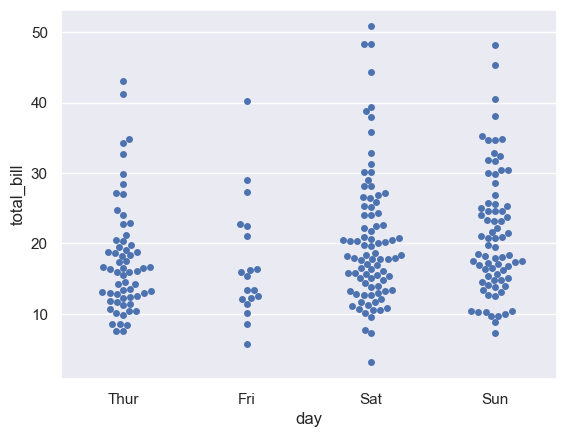

In [49]:
sns.swarmplot(data=tips, x='day', y='total_bill');

Also, when using `catplot()`, the parameter `strip` is the default value of the `kind` parameter. 

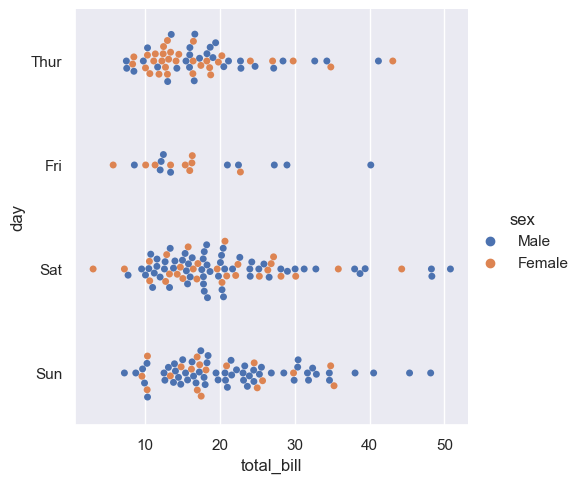

In [50]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='swarm');

### Plotting Multiple Categorical Plots

We can plot multiple plots with `catplot()` by setting the parameters `col` or `row` to a data feature.

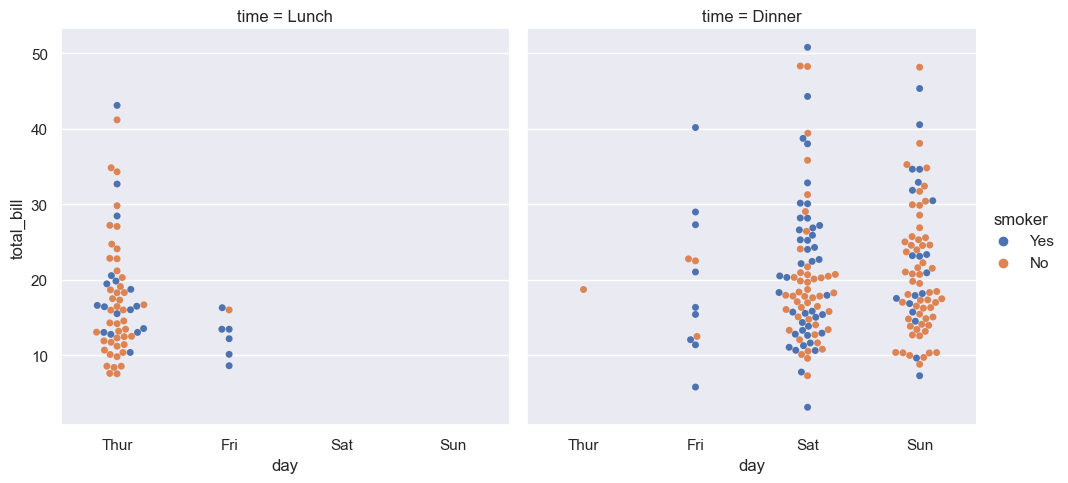

In [51]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', col='time', kind='swarm');

## 12.4 Regression Plots <a id="12.4-regression-plots"/>

Seaborn provides plots for visualizing the linear relationship between the features. The function `lmplot()` can be used for fitting a linear regression model, where `lm` stands for linear model. The figure shows the regression line, as well as the uncertainty in the predicted values corresponding to 95% confidence interval for the regression. 

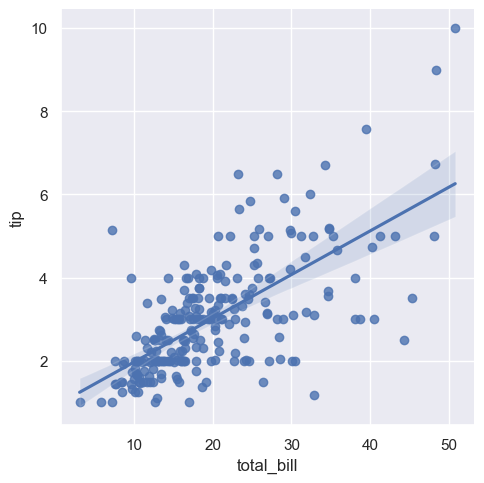

In [52]:
sns.lmplot(data=tips, x='total_bill', y='tip');

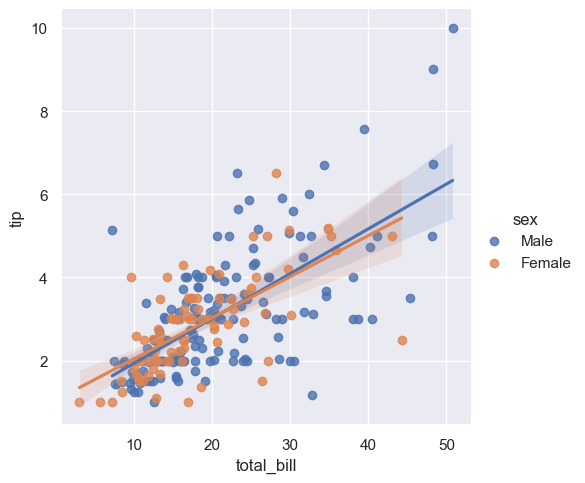

In [53]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex');

If one of the features is a categorical variable (e.g., `survived` in the next example), linear regression models may not produce good results, and an alternative is to apply a logistic regression model by using `logistic=True`. 

The function `lmplot()` also allows to add jitter to the data in the scatter plot by using the `y_jitter` parameter, in order to better visualize the values. Jitter is applied only to the scatter plot, and it is not applied to the data for fitting the regression model. 

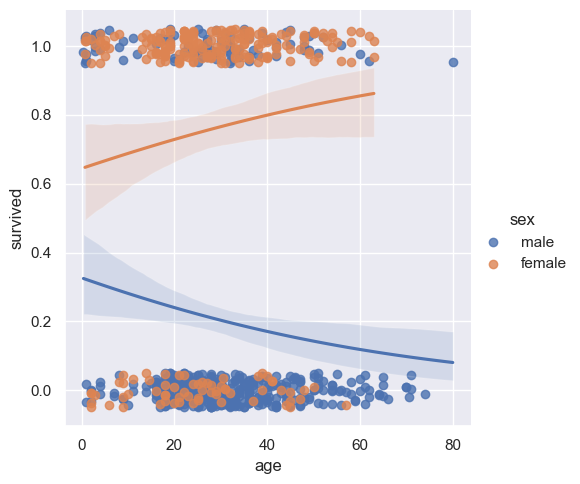

In [54]:
sns.lmplot(data=titanic, x='age', y='survived', logistic=True, y_jitter=0.05, hue='sex');

If the relationship between two features is not linear, the function `lmplot()` can also fit a polynomial regression model to identify nonlinear trends in the dataset by using the parameter `order`. E.g., `order=2` in the next cell fits a second-degree polynomial regression model. 

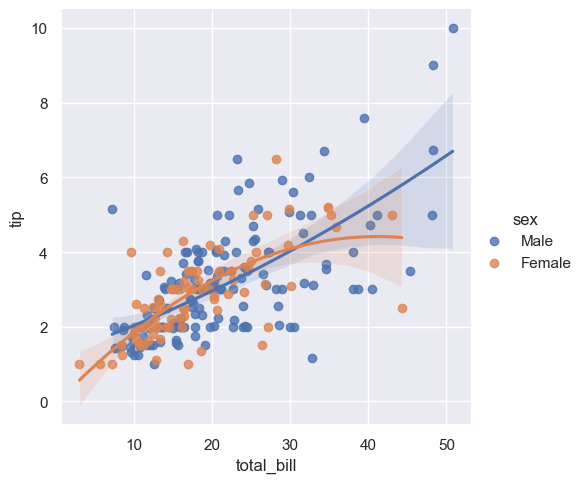

In [55]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', order=2);

As we explained in the above sections, we can create subplots by setting the parameters `col` and `row` to specific data features.

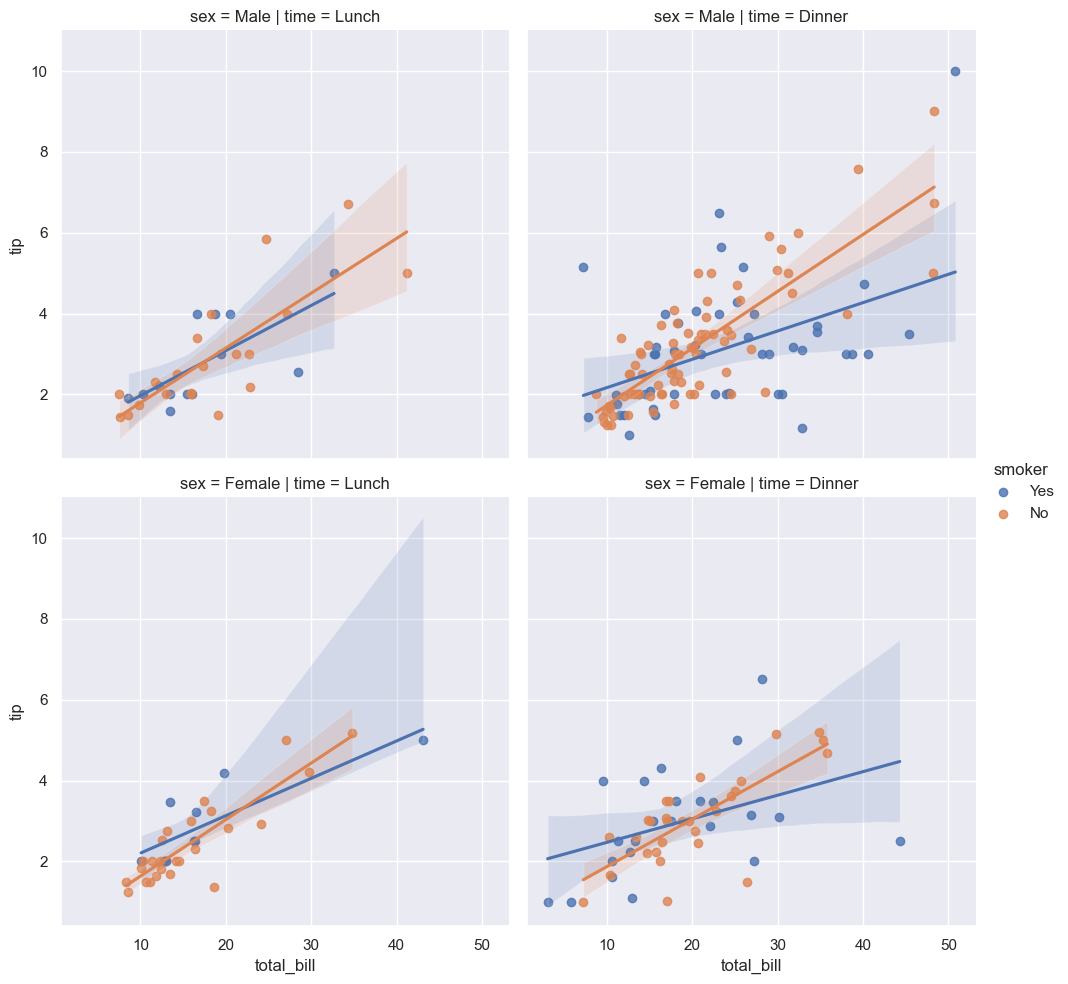

In [56]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time', row='sex');

## 12.5 Multiple Plots <a id="12.5-multiple-plots"/>

Multiple plot functions in Seaborn are used to visualize multiple features along different axes. Seaborn provides the following functions:

- `FacetGrid()`
- `PairGrid()`
- `PairPlot()`

### `FacetGrid()`

The function `FacetGrid()` creates multiple grid plots and allows plotting the features on row and column axes in order to visualize the relationship between multiple features in separate subplots. It allows to draw a grid based on three parameters: `col`, `row`, and `hue`, where `hue` allows to draw different categories in a subplot with separate colors. 

After the grid is created with `FacetGrid()`, visualizations are added with the `map()` method that specifies the plot type (such as scatter, histogram, bar plot, etc.). 

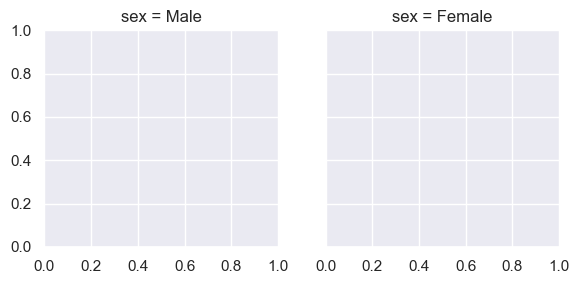

In [57]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker')

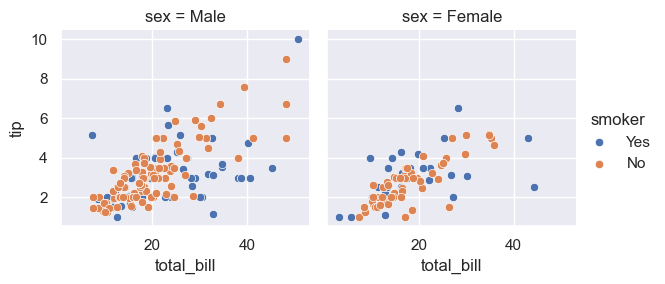

In [58]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker')
plot.map(sns.scatterplot,'total_bill', 'tip')
plot.add_legend();

`FacetGrid()` allows to control the height, aspect ratio, and other properties of the subplots in the grid.

C:\Users\vakanski\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


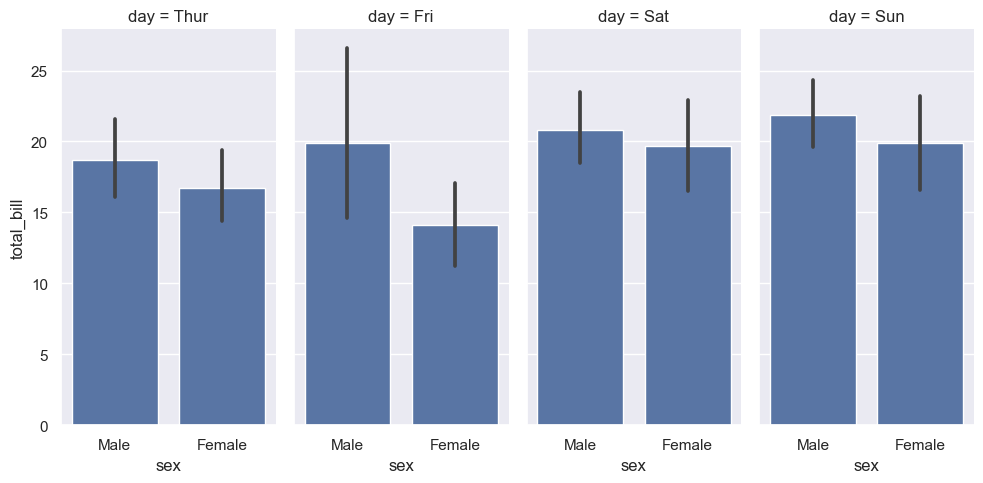

In [59]:
plot = sns.FacetGrid(tips, col='day', height=5, aspect=0.5)
plot.map(sns.barplot, 'sex', 'total_bill');

### `PairGrid()`

The function `PairGrid()` allows to plot pairwise relationships between the features in the dataset. It is similar to the function `pairplot()` that we saw earlier for multivariate data analysis. 

An example is shown next, where `PairGrid` creates a grid of subplots by assigning each row and column to a different feature in the dataset. Since the `tips` dataset has three numerical columns, the created grid is of 3x3 size. 

Note also the difference between `FacetGrid()` and `PairGrid()`. `FacetGrid()`shows the same relationship between two features, conditioned on different categories of other features. E.g., in the above example, all subplots show the scatter plots of `total_bill` and `tip`, conditioned on the features `sex` and `smoker`. `PariGrid()` shows different relationships between the features in the subplots. 

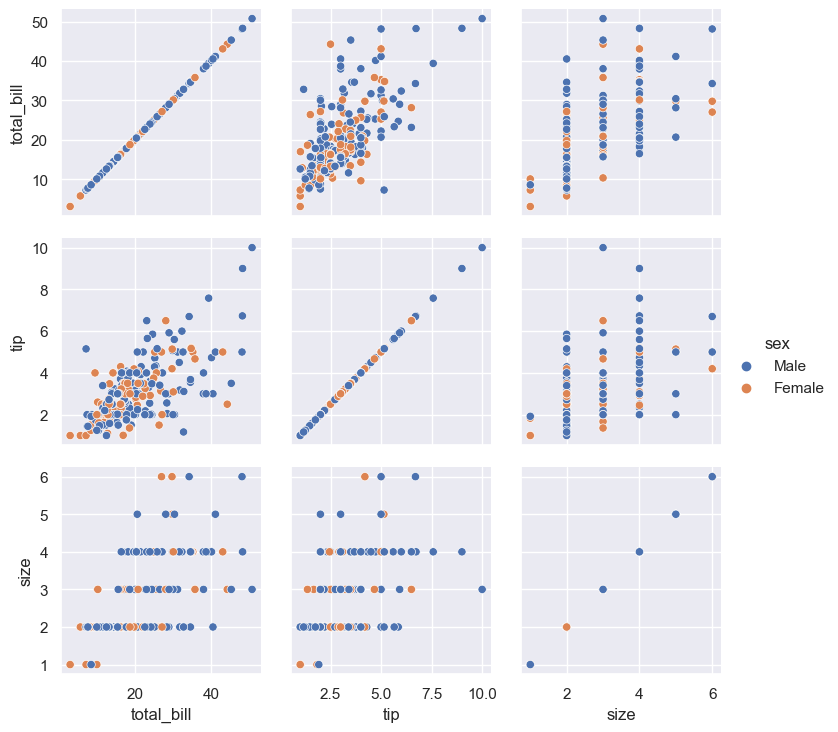

In [60]:
plot = sns.PairGrid(tips, hue='sex')
plot.map(sns.scatterplot)
plot.add_legend();

With `PairGrid()`, we can also be selective on the type of plots to include in diagonal subplots with `map_diag` and in the off-diagonal subplots (e.g., `map_upper` for the upper off-diagonal subplots and `map_lower` for the lower off-diagonal subplots). 

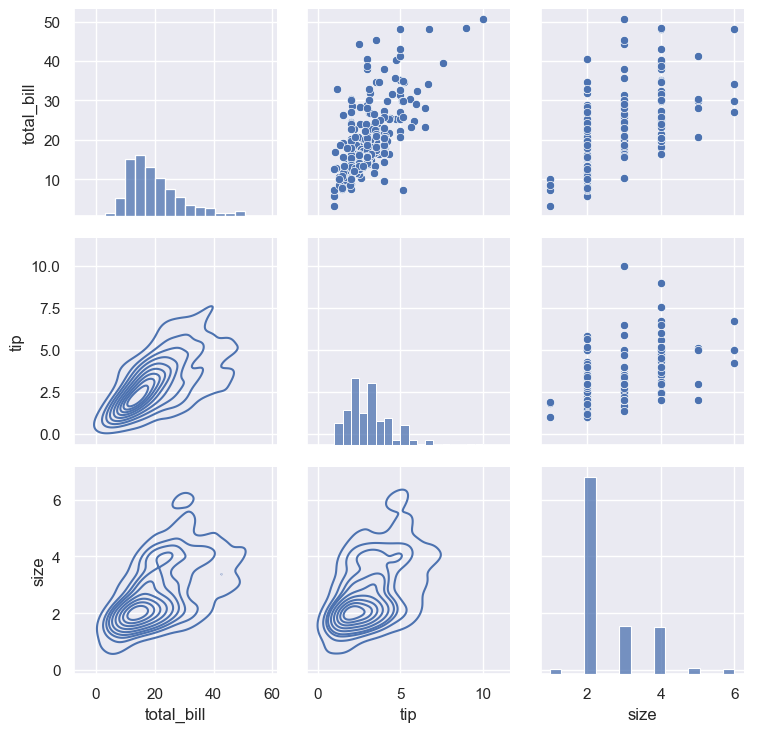

In [61]:
plot = sns.PairGrid(tips)
plot.map_diag(sns.histplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)
plot.add_legend();

Also, instead of plotting all features in a dataset, we can select the features we are interested in.

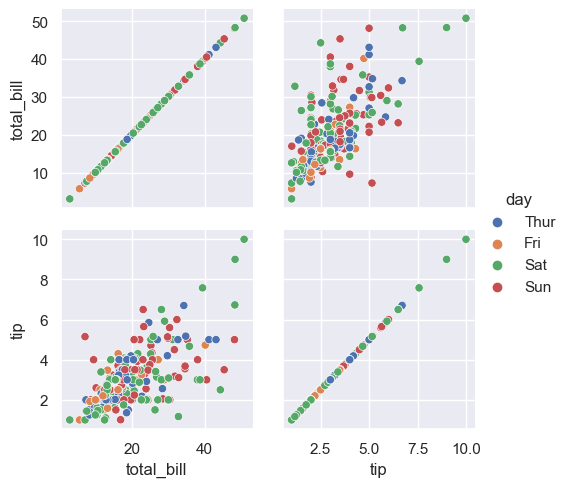

In [62]:
plot = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
plot.map(sns.scatterplot)
plot.add_legend();

### `pairplot()`

The function `pairplot()` is very similar to `PairGrid()`, and it allows to plot pairwise relationships between the features in a dataset. It provides faster plotting in comparison to `PairGrid()` but it also offers less functionality. 

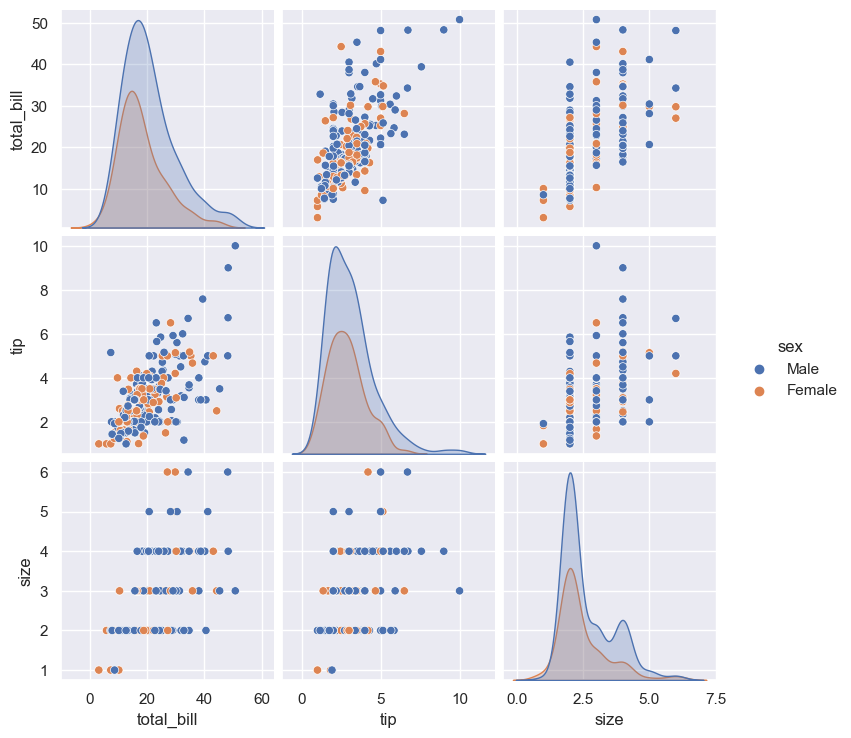

In [63]:
sns.pairplot(tips, hue='sex');

## 12.6 Matrix Plots <a id="12.6-matrix-plots"/>

When performing data analysis, in some cases it is beneficial to visualize array data as color-encoded matrices that can be used to find patterns within the data.  

### Heat Maps

The function `heatmap()` in Seaborn adds colors to the elements in a matrix, and attaches a color bar to the plot. 

Let's visualize a matrix with random values. 

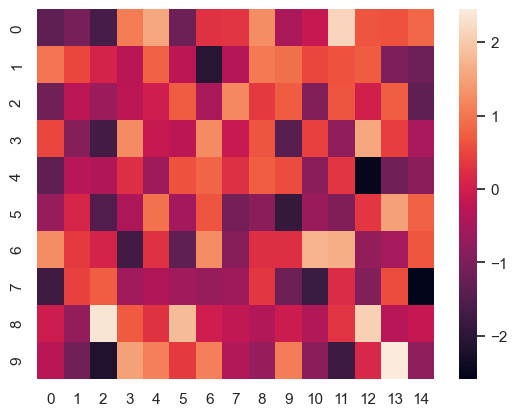

In [64]:
sns.set_theme()
data = np.random.randn(10,15)
sns.heatmap(data);

Or, if you recall from the previous lecture, we used the `.corr()` method in pandas to calculate the correlation between the features, and afterward we used `heatmap` to visualize the correlations. By applying colors that correspond to the correlation values, it makes it easier to identify relationships between the features. 

In [65]:
# Finding the correlation of features in titanic dataset
correlation = titanic.corr()
correlation

C:\Users\vakanski\AppData\Local\Temp\ipykernel_8840\971058138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic.corr()


survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

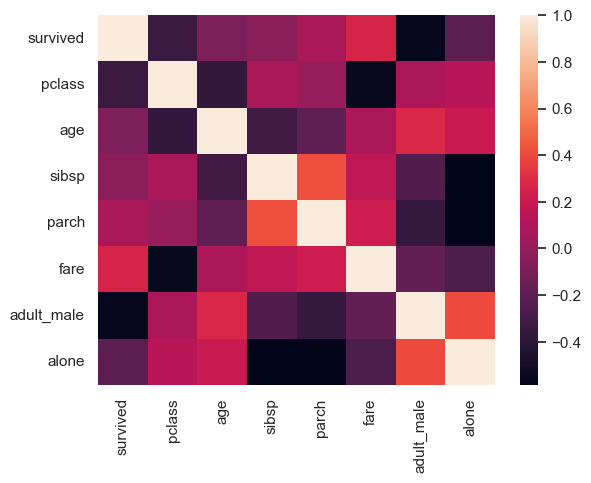

In [66]:
sns.heatmap(correlation);

If we want to add the values to the heat map, we can set the parameter `annot` to True.

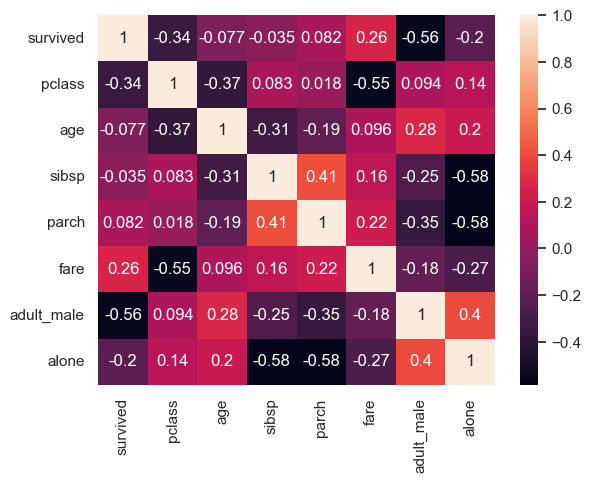

In [67]:
sns.heatmap(correlation, annot=True);

## 12.7 Styles, Themes, and Colors <a id="12.7-styles,-themes,-and-colors"/>

Seaborn allows to customize the visualizations depending on our needs, and provides ways to control the styles, themes, and colors in our plots.

### Styles and Themes

There are five styles in Seaborn plots: 

- `darkgrid` (default) provides a dark background with grid lines
- `whitegrid` provides a white background with grid lines
- `dark` provides a dark background without grid lines
- `white` provides a white background without grid lines
- `ticks` provides a light gray background with tick marks on the axes

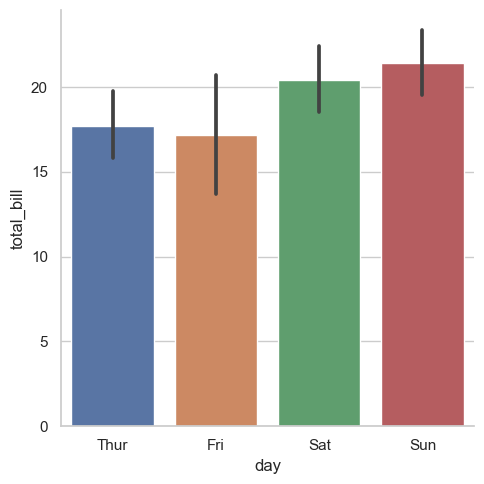

In [68]:
sns.set_style('whitegrid')
sns.catplot(data=tips, x='day', y='total_bill', kind='bar');

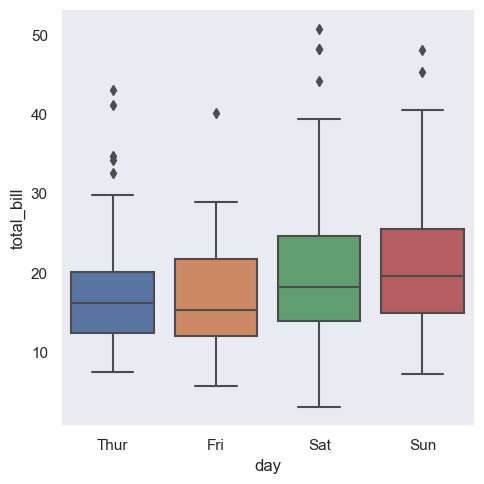

In [69]:
sns.set_style('dark')
sns.catplot(data=tips, x='day', y='total_bill', kind='box');

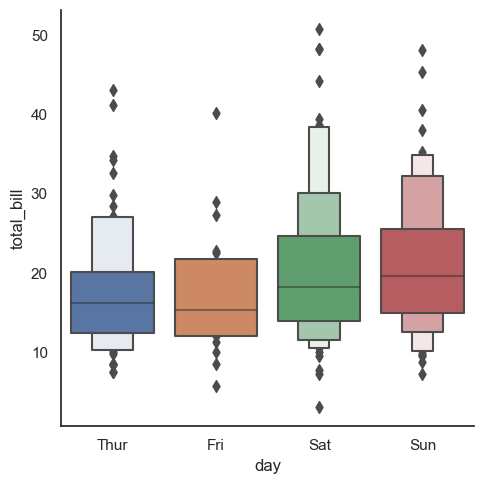

In [70]:
sns.set_style('white')
sns.catplot(data=tips, x='day', y='total_bill', kind='boxen');

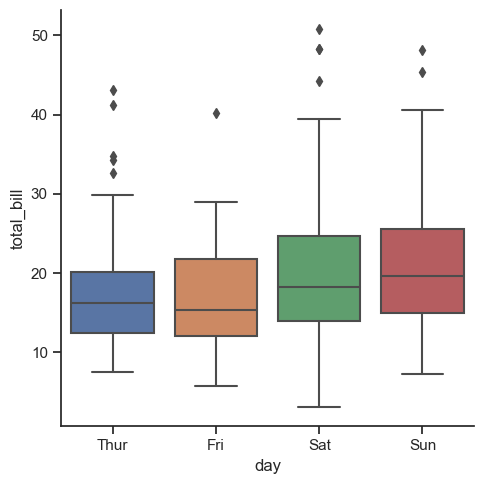

In [71]:
sns.set_style('ticks')
sns.catplot(data=tips, x='day', y='total_bill', kind='box');

#### Removing the Axes Spines

We can use the function `despine()` to remove the axes spines (borders) in the plots, or to show the spines by setting them to False.

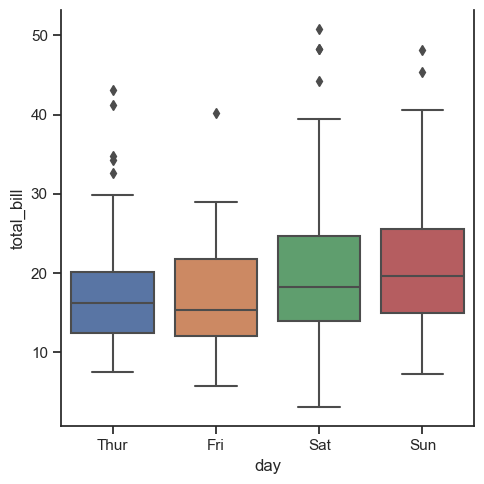

In [72]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
sns.despine(right=False);

We can also move the spines away from the data by setting the `offset` distance that spines should move away from the axes.

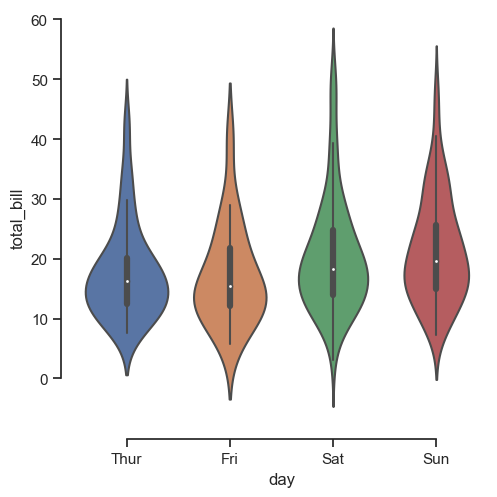

In [73]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')
sns.despine(offset=10, trim=True);

#### Scaling Plot Elements with Context

Context is used to control the scale of the elements of the plot. This can be helpful depending on where we want to use the visualizations. 

The function `set_context()` allows to select four contexts: `paper`, `notebook` (default), `talk`, and `poster`.

In [74]:
sns.set_theme()

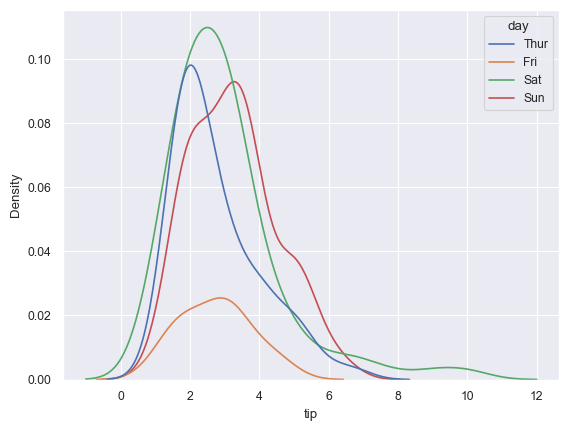

In [75]:
sns.set_context('paper')
sns.kdeplot(data=tips, x='tip', hue='day');

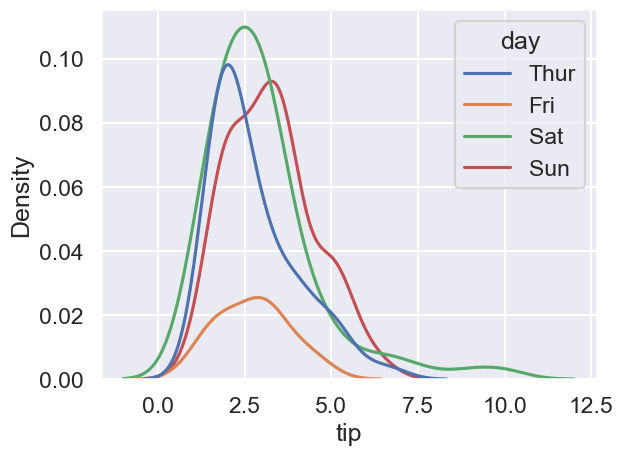

In [76]:
sns.set_context('talk')
sns.kdeplot(data=tips, x='tip', hue='day');

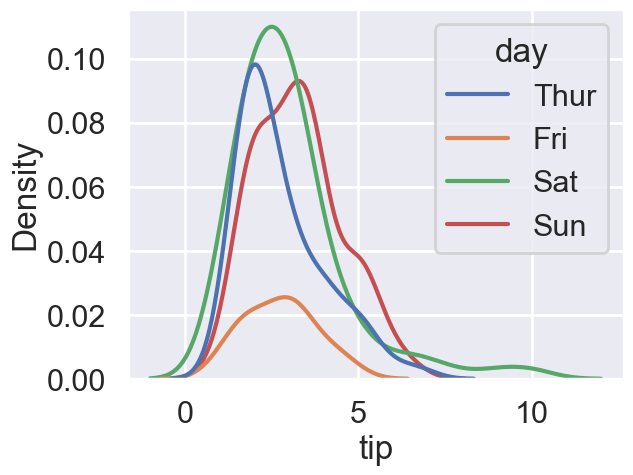

In [77]:
sns.set_context('poster')
sns.kdeplot(data=tips, x='tip', hue='day');

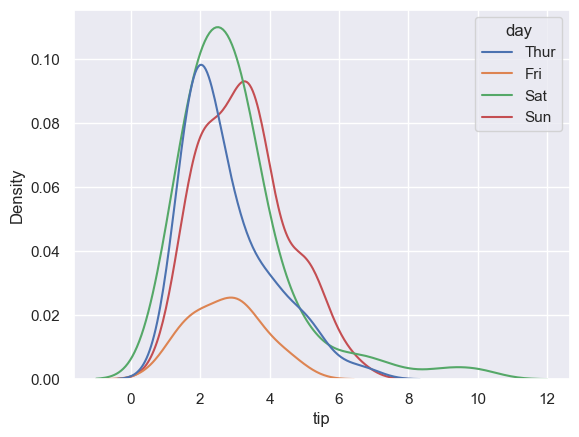

In [78]:
sns.set_context('notebook')
sns.kdeplot(data=tips, x='tip', hue='day');

### Colors

Seaborn allows us to choose colors from a wide range of color palettes for plot visualization. 

To specify preferred colors, we can either use `color_palette()` before each plot, or set the parameter `palette` inside the plot definition.

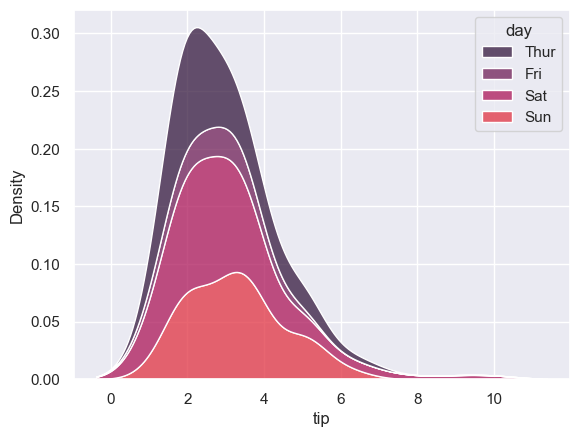

In [79]:
sns.set_palette('rocket')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

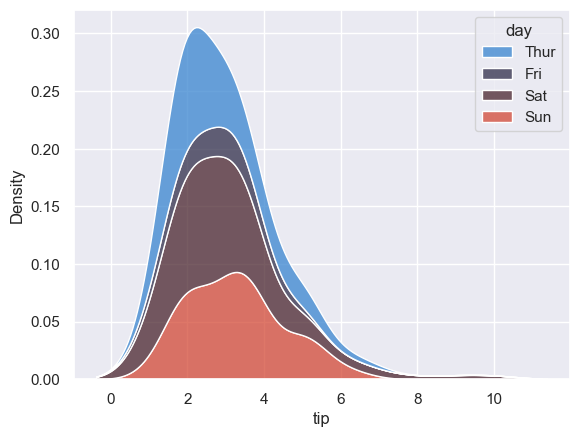

In [80]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack', palette='icefire');

To see the available color palettes, check out the Seaborn [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html). 

In [81]:
# Check the palettes

sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [82]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Also, we can use `sns.set_theme()` to directly set the style, palette, and context.

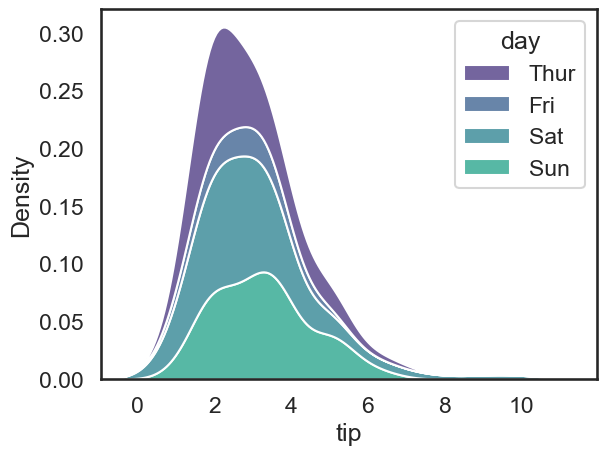

In [83]:
sns.set_theme(style='white', context='talk', palette='viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

## References <a id="references"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Seaborn Tutorial: An Introduction to Seaborn, available at: [https://seaborn.pydata.org/tutorial/introduction.html](https://seaborn.pydata.org/tutorial/introduction.html).

[BACK TO TOP](#top)